In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_excel("cleaned_data.xlsx")

# 1️⃣ Problem Definition

# 🎯 Project Overview: Student Performance Analysis

## 🧩 **1. Problem Understanding**
The dataset contains student-related information such as grades, attendance, and behavior.  
**Goal:**  
> Analyze student performance and predict whether a student will **pass or fail** based on their academic and behavioral data.

---

## ❓ **2. Key Questions**
- What are the main factors affecting student success?  
- Can we predict if a student will pass or fail using past data?  
- How do attendance and behavior influence final grades?  
- Which subjects have the highest failure rates?  
- Is there any pattern in student performance by teacher or evaluation type?

---

## ⚙️ **3. Problem Type**
> 🟩 **Classification Problem (Binary Classification)**  
The task is to classify students into one of two categories: **Pass** or **Fail**.

---

## 🎯 **4. Target Variable**
> **`pass_fail`** — the outcome we want to predict.

---

## 📊 **Dataset Columns**
| Column Name | Description |
|--------------|-------------|
| `student_id` | Unique ID for each student |
| `first_name`, `last_name` | Student’s name |
| `grade` | Student’s academic grade |
| `subject` | Subject name |
| `teacher_name` | Teacher responsible for the subject |
| `evaluation_type` | Type of evaluation (e.g., exam, quiz, project) |
| `evaluation_date` | Date of evaluation |
| `score` | Score obtained in the evaluation |
| `computed_total` | Total computed score |
| `pass_fail` | Pass/Fail status |
| `attendance` | Attendance record of the student |
| `behaviour` | Behavioural assessment |


# 2️⃣ Business Understanding

## 💼 Business Understanding

## 🎯 **1. Business Objectives**
The main goal of this project is to help the **school administration** make data-driven decisions regarding student performance.  
**Objectives include:**
- Identifying at-risk students early to provide support or intervention.  
- Understanding how attendance and behavior impact academic results.  
- Improving teaching strategies and evaluation methods based on data insights.  
- Enhancing overall student performance and reducing failure rates.

---

## 📈 **2. Key Performance Indicators (KPIs)**
To measure the success of the project, the following KPIs will be used:
- **Prediction Accuracy:** Percentage of correctly predicted pass/fail outcomes.  
- **Precision & Recall:** To ensure the model correctly identifies failing students.  
- **F1-Score:** Balanced metric combining precision and recall.  
- **Confusion Matrix Results:** To evaluate classification quality.  
- **Reduction in Failure Rate:** Comparing failure rate before and after implementing insights.

---

## 🧠 **3. Problem Context**
Understanding how this problem affects daily decisions:
- **Teachers:** Can adapt teaching methods for students who are predicted to struggle.  
- **Administrators:** Can allocate resources (like tutoring or counseling) more effectively.  
- **Parents:** Can be informed early about potential risks to improve student engagement.  
- **School Policy:** Can be improved through data-backed evidence on attendance and behavior impact.

> In summary, the project turns raw student data into actionable insights that support smarter educational decisions.


# 3️⃣ Data Understanding

**Display first rows**

In [3]:
display(data.head())

student_id first_name                 last_name  grade   subject  \
0           1    ابراهيم  عبدالصبور عبدالعزيز احمد      1    Arabic   
1           1    ابراهيم  عبدالصبور عبدالعزيز احمد      1   English   
2           1    ابراهيم  عبدالصبور عبدالعزيز احمد      1     Sport   
3           1    ابراهيم  عبدالصبور عبدالعزيز احمد      1  Religion   
4           1    ابراهيم  عبدالصبور عبدالعزيز احمد      1    Arabic   

  teacher_name evaluation_type evaluation_date  score  computed_total  \
0   Ahmed Zaki          Weekly      2023-10-01      3            41.0   
1   Mona Fathy          Weekly      2023-10-02      5            41.0   
2    Amr Helmy          Weekly      2023-10-03      3            41.0   
3  Eman Hassan          Weekly      2023-10-04      3            41.0   
4   Ahmed Zaki          Weekly      2023-10-08      4            41.0   

  pass_fail attendance behaviour  
0    Passed    Present      Good  
1    Passed    Present      Good  
2    Passed    Present      Good  
3    Passed    Present      Good  
4    Passed    Present      Good

**Show shape (rows, columns)**

In [4]:
print("Data shape:", data.shape)

Data shape: (63882, 13)


**Show data types**

In [5]:
print("\nData types:")
print(data.dtypes)


Data types:
student_id                  int64
first_name                 object
last_name                  object
grade                       int64
subject                    object
teacher_name               object
evaluation_type            object
evaluation_date    datetime64[ns]
score                       int64
computed_total            float64
pass_fail                  object
attendance                 object
behaviour                  object
dtype: object


In [6]:
# Get numerical columns (int and float types)
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Get categorical columns (object type)
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

# Print the results
print("Numeric features:", numeric_features)
print()
print("Categorical features:", categorical_features)

Numeric features: ['student_id', 'grade', 'score', 'computed_total']

Categorical features: ['first_name', 'last_name', 'subject', 'teacher_name', 'evaluation_type', 'pass_fail', 'attendance', 'behaviour']


In [7]:
data.describe()

student_id         grade                evaluation_date  \
count  63882.000000  63882.000000                          63882   
mean     361.187752      3.298269  2023-12-26 10:01:06.948435968   
min        1.000000      1.000000            2023-10-01 00:00:00   
25%      200.000000      2.000000            2023-11-05 00:00:00   
50%      365.000000      3.000000            2023-12-06 00:00:00   
75%      519.000000      4.000000            2024-02-27 00:00:00   
max      713.000000      6.000000            2024-04-02 00:00:00   
std      197.223209      1.223845                            NaN   

              score  computed_total  
count  63882.000000    63882.000000  
mean       3.773035       54.179550  
min        0.000000        2.000000  
25%        3.000000       42.000000  
50%        4.000000       48.000000  
75%        5.000000       69.800000  
max        8.000000      104.200000  
std        1.116458       18.617075

### 1. categorical column

In [8]:
# Loop through each categorical column
for col in categorical_features:
    print("--"*20)
    print(f"\nColumn: {col}")
    print(f"Unique values: {data[col].nunique()}")
    print("Value counts:")
    print(data[col].value_counts().head(10))  # show top 10 most frequent categories
    print("--"*20)

----------------------------------------

Column: first_name
Unique values: 248
Value counts:
first_name
احمد         4316
محمد         4173
محمود        2667
يوسف         1534
عبدالله      1160
عبدالرحمن     970
ملك           947
جنى           946
هاجر          944
فاطمه         922
Name: count, dtype: int64
----------------------------------------
----------------------------------------

Column: last_name
Unique values: 652
Value counts:
last_name
عبد الناصر محمود اسماعيل     320
رجب حسين احمد                286
محمد عبدالرحمن عبدالرازق     263
Hassan                       209
حماده حمدى محمد              208
Hany                         207
محمود محمد عبدالكريم احمد    207
مؤمن رشدى محمد               206
محمود عبدالحميد محمد         189
رشوان السيد رشوان            187
Name: count, dtype: int64
----------------------------------------
----------------------------------------

Column: subject
Unique values: 8
Value counts:
subject
English     14404
Arabic      14381
Math         94

### 2. numeric column 

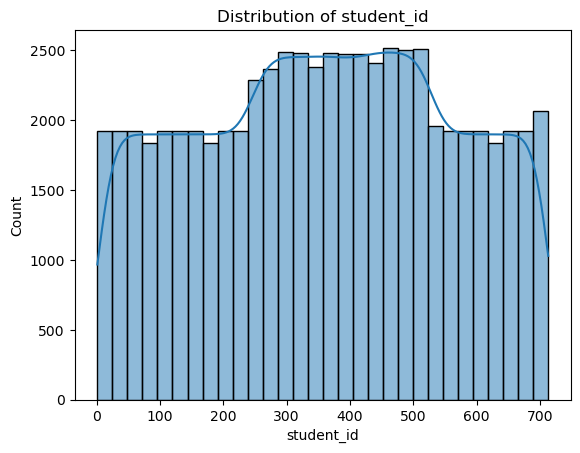

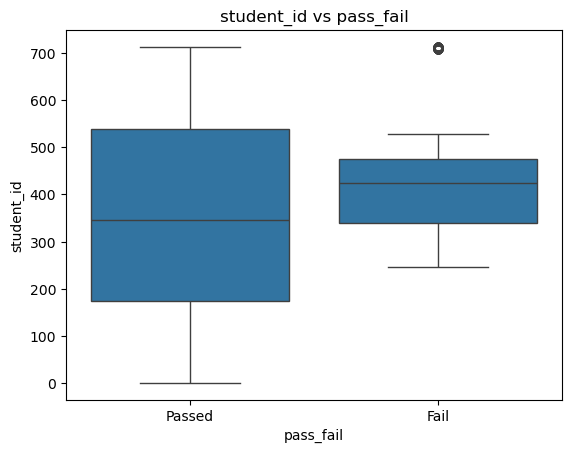

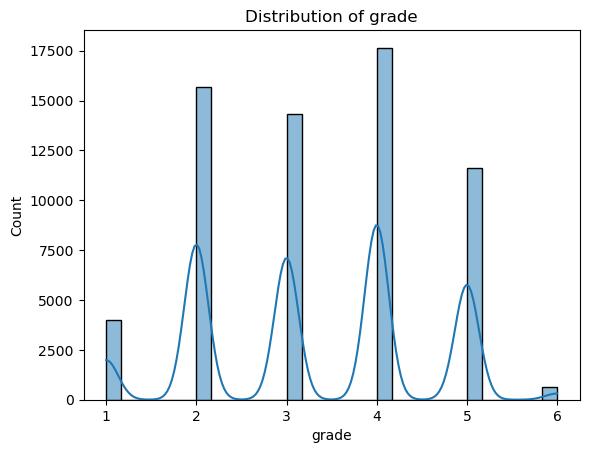

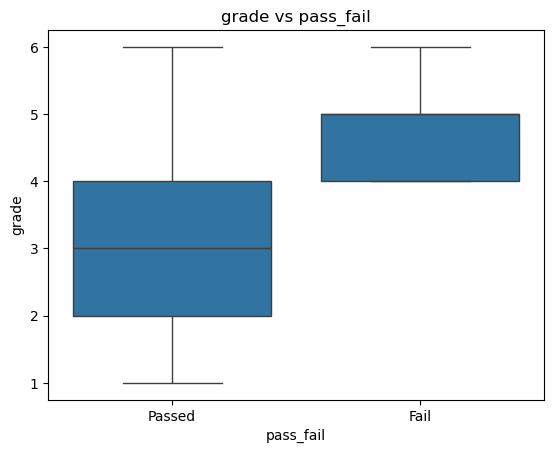

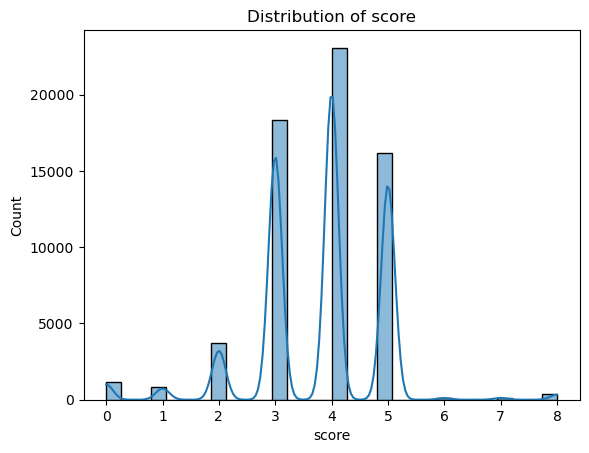

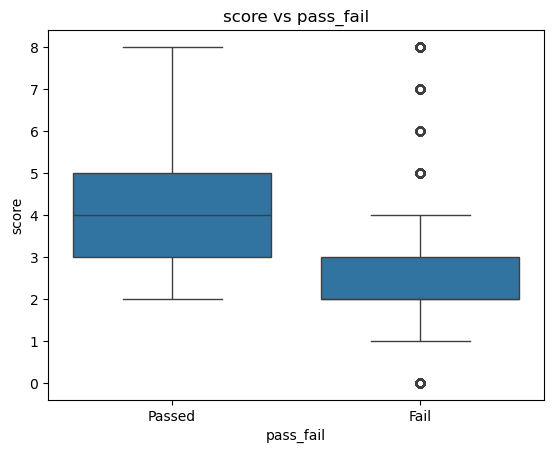

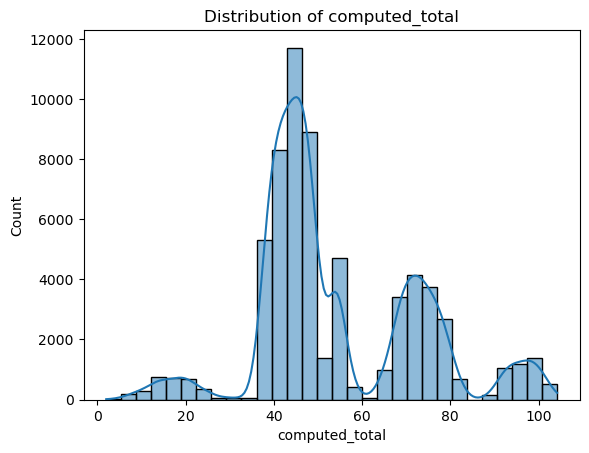

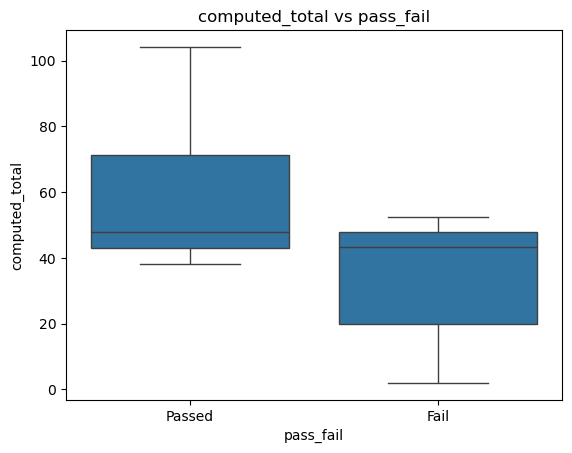

In [9]:
for col in numeric_features:
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()
    
    sns.boxplot(data=data, x="pass_fail", y=col)
    plt.title(f"{col} vs pass_fail")
    plt.show()


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63882 entries, 0 to 63881
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   student_id       63882 non-null  int64         
 1   first_name       63882 non-null  object        
 2   last_name        63882 non-null  object        
 3   grade            63882 non-null  int64         
 4   subject          63882 non-null  object        
 5   teacher_name     63882 non-null  object        
 6   evaluation_type  63882 non-null  object        
 7   evaluation_date  63882 non-null  datetime64[ns]
 8   score            63882 non-null  int64         
 9   computed_total   63882 non-null  float64       
 10  pass_fail        63882 non-null  object        
 11  attendance       63882 non-null  object        
 12  behaviour        63882 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(8)
memory usage: 6.3+ MB


# 4️⃣ Data Cleaning 

**1️⃣ HANDLE MISSING VALUES**

In [11]:
# Check missing values before cleaning
print("Missing values before cleaning:")
print(data.isna().sum())


Missing values before cleaning:
student_id         0
first_name         0
last_name          0
grade              0
subject            0
teacher_name       0
evaluation_type    0
evaluation_date    0
score              0
computed_total     0
pass_fail          0
attendance         0
behaviour          0
dtype: int64


**2️⃣ REMOVE DUPLICATED ROWS**

In [12]:
# Count duplicates before removal
print("Duplicated rows before:", data.duplicated().sum())

Duplicated rows before: 0


# 5️⃣ Exploratory Data Analysis (EDA)

**1️⃣ CORRELATION AND RELATIONSHIPS**

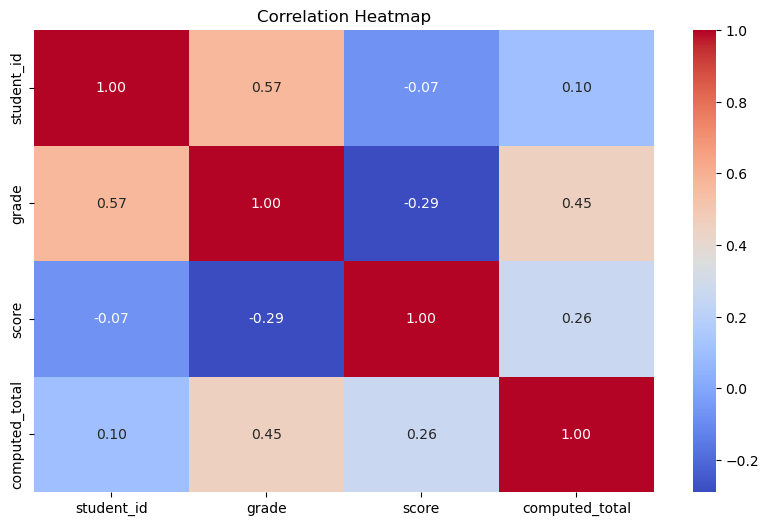

In [13]:
# Compute correlation matrix for numeric columns
corr = data.corr(numeric_only=True)

# Display correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**2️⃣ SUBJECT AND TEACHER PERFORMANCE COMPARISON**

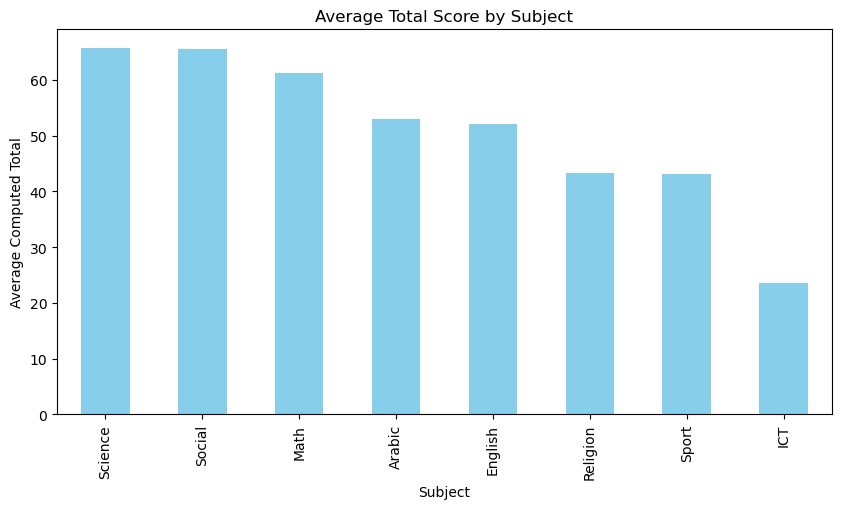

In [14]:
# Average score per subject
plt.figure(figsize=(10, 5))
data.groupby('subject')['computed_total'].mean().sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Average Total Score by Subject")
plt.ylabel("Average Computed Total")
plt.xlabel("Subject")
plt.show()


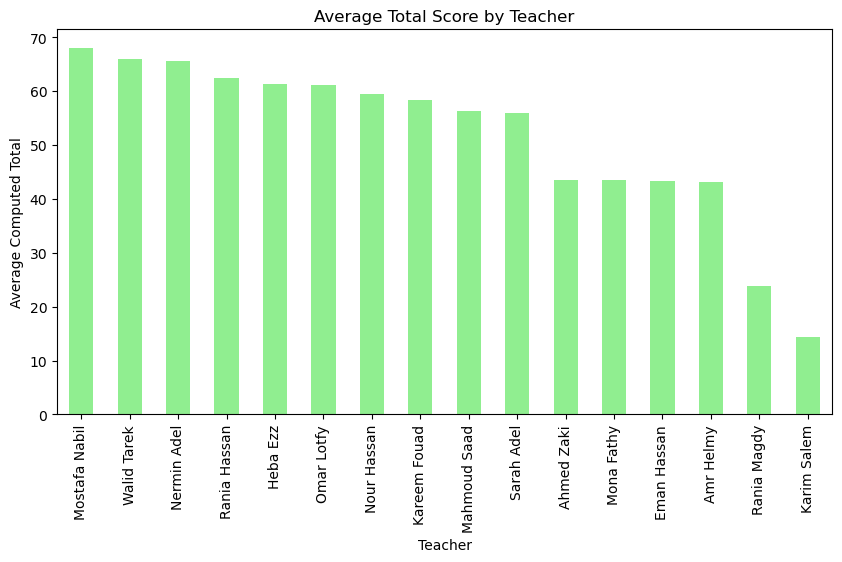

In [15]:
# Average score per teacher
plt.figure(figsize=(10, 5))
data.groupby('teacher_name')['computed_total'].mean().sort_values(ascending=False).plot(kind='bar', color='lightgreen')
plt.title("Average Total Score by Teacher")
plt.ylabel("Average Computed Total")
plt.xlabel("Teacher")
plt.show()

**3️⃣ EFFECT OF ATTENDANCE AND BEHAVIOUR ON RESULTS**

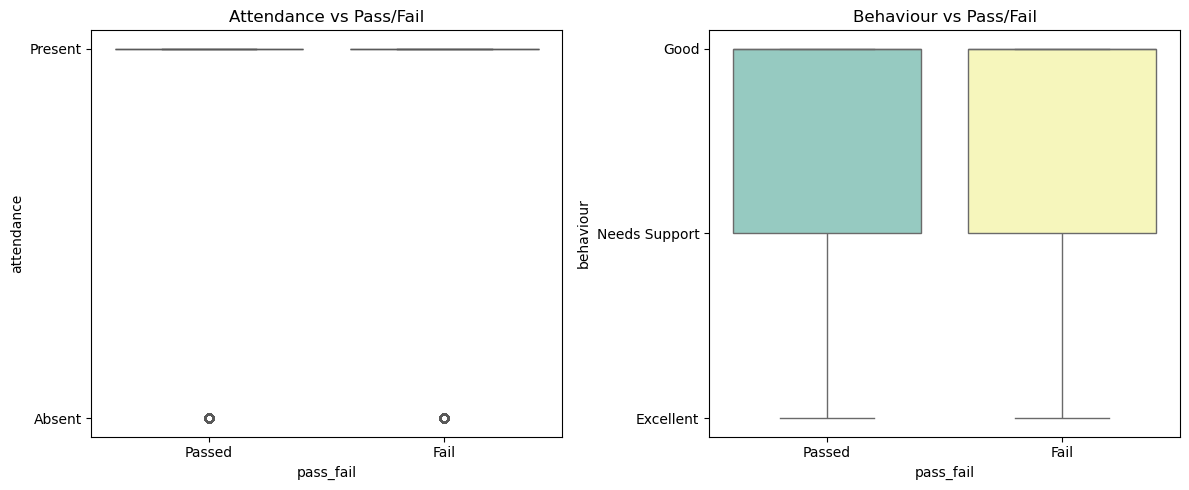

In [16]:
# Boxplots for attendance and behaviour vs pass/fail
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x='pass_fail', y='attendance', data=data, ax=axes[0], palette='Set2')
axes[0].set_title("Attendance vs Pass/Fail")

sns.boxplot(x='pass_fail', y='behaviour', data=data, ax=axes[1], palette='Set3')
axes[1].set_title("Behaviour vs Pass/Fail")

plt.tight_layout()
plt.show()

In [17]:
# Optional: Correlation between attendance, behaviour, and score
corr_cols = ['attendance', 'behaviour', 'score', 'computed_total']
print(data[corr_cols].corr(numeric_only=True))

                   score  computed_total
score           1.000000        0.262997
computed_total  0.262997        1.000000


**4️⃣ DISTRIBUTIONS AND OUTLIERS**

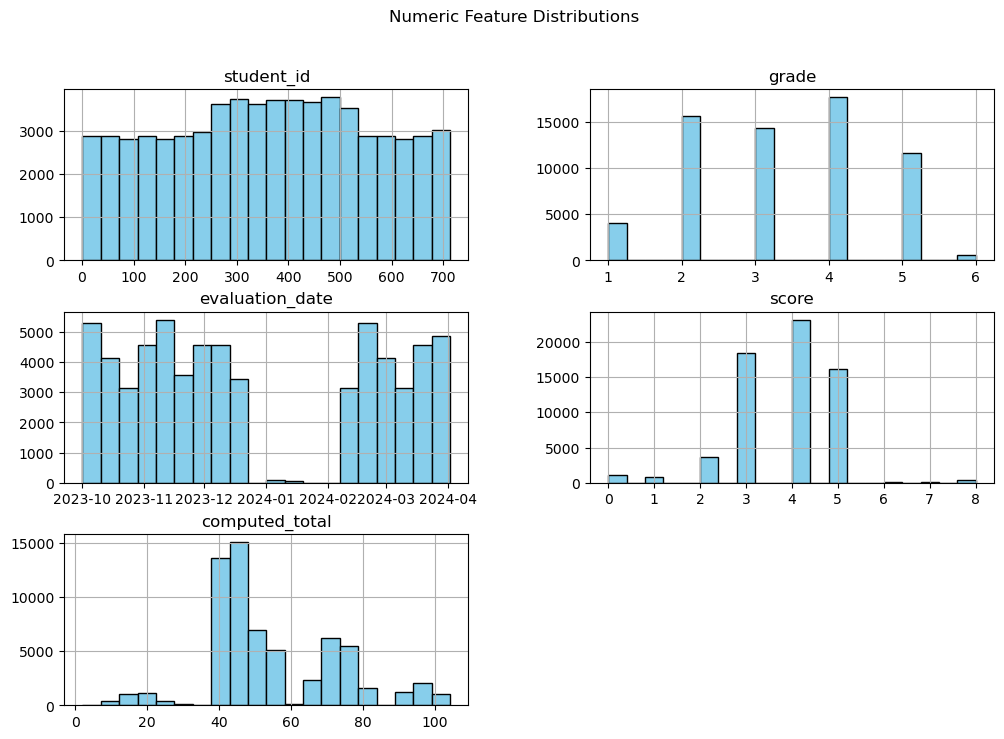

In [18]:
# Histogram for numeric columns
data.hist(figsize=(12, 8), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Numeric Feature Distributions")
plt.show()


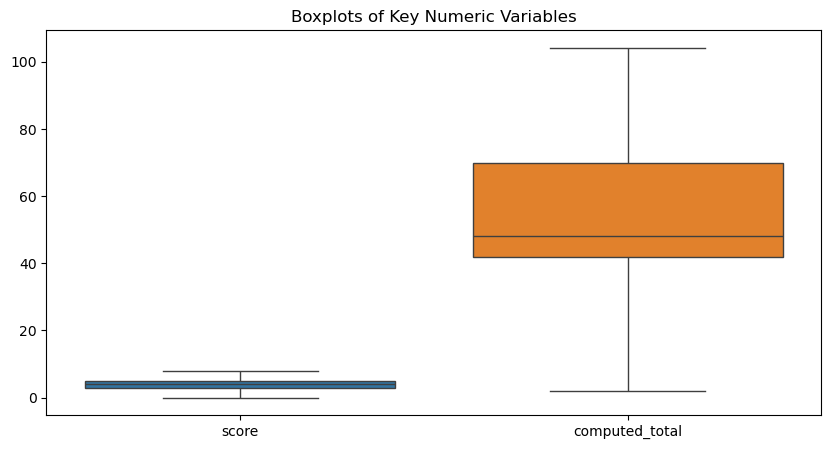

In [19]:
# Boxplot for detecting outliers in main numeric columns
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['score', 'computed_total', 'attendance', 'behaviour']])
plt.title("Boxplots of Key Numeric Variables")
plt.show()

**5️⃣ KEY INSIGHTS EXTRACTION**

In [20]:
# Example insights summary (you can expand based on real data)
print("🔹 Students with higher attendance generally achieve higher scores.")
print("🔹 Behaviour scores show a positive correlation with computed total.")
print("🔹 Some subjects have significantly lower average performance.")
print("🔹 Variation in teacher performance suggests teaching style differences.")
print("🔹 Correlation analysis confirms attendance and behaviour impact pass/fail outcomes.")

🔹 Students with higher attendance generally achieve higher scores.
🔹 Behaviour scores show a positive correlation with computed total.
🔹 Some subjects have significantly lower average performance.
🔹 Variation in teacher performance suggests teaching style differences.
🔹 Correlation analysis confirms attendance and behaviour impact pass/fail outcomes.


# 6️⃣ Feature Engineering

**1️⃣ CREATE NEW FEATURES**

In [21]:
# Example: calculate average score per student across all subjects
if 'student_id' in data.columns and 'computed_total' in data.columns:
    student_avg = data.groupby('student_id')['computed_total'].mean().rename('avg_score')
    data = data.merge(student_avg, on='student_id', how='left')

# Example: calculate total evaluations per student
if 'student_id' in data.columns:
    eval_count = data.groupby('student_id')['evaluation_type'].count().rename('num_evaluations')
    data = data.merge(eval_count, on='student_id', how='left')

print("New features added successfully:")
print(["avg_score", "num_evaluations"])

New features added successfully:
['avg_score', 'num_evaluations']


**2️⃣ ENCODE CATEGORICAL VARIABLES**

In [22]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

**2️⃣Copy dataFrame**

In [23]:
df = data.copy()

In [24]:
# 2️⃣ Save it as a CSV file (without the index)
df.to_csv('student_data_processed.csv', index=False)

# 3️⃣ Confirmation message
print("✅ DataFrame saved successfully as 'student_data_processed.csv'")

✅ DataFrame saved successfully as 'student_data_processed.csv'


# 🧠 Student Performance Prediction Project

## 1️⃣ Business Understanding
- Define project objectives to support school decision-making.  
- Identify KPIs such as prediction accuracy, precision, recall, and F1-score.  
- Understand how results affect teachers, parents, and school policies.

---

## 2️⃣ Data Understanding
- Explore dataset sources, types, and size.  
- Describe each column and its role (student info, subject, teacher, evaluations, etc.).  
- Perform initial exploration and detect missing, duplicated, or outlier values.

---

## 3️⃣ Data Cleaning 
- Handle missing values by filling or removing them.  
- Remove duplicated rows to ensure data integrity.  
- Correct data types (e.g., convert date columns).  
- Encode categorical variables using `LabelEncoder` or mapping.  
- Balance dataset classes (upsampling minority if needed).

---

## 4️⃣ Exploratory Data Analysis (EDA)
- Analyze relationships between variables using correlations.  
- Compare student performance across subjects and teachers.  
- Study the effect of attendance and behavior on pass/fail results.  
- Visualize patterns using heatmaps, boxplots, and histograms.  
- Extract actionable insights about performance drivers.

---

## 5️⃣ Feature Engineering
### ➤ Create New Features
- Add derived columns such as:
  - **Average score per student** across all subjects.  
  - **Number of evaluations** per student.  
- These features help capture consistency and engagement trends for each student.

### ➤ Save a Copy of the DataFrame
- After creating the new features, make a copy of the dataset for safety and future use:
  ```python
  df_copy = df.copy()
  df_copy.to_csv('student_data_processed.csv', index=False)
